# May 9, 2022

## Project 9 - First digits, last digits

In [14]:
with open('NYT_2010_06_01.txt','r') as f:
    s = f.read()
    
articles = s.split('------------')

In [15]:
article = articles[7]

In [16]:
print(article)


 
Greek government, racing to secure financial aid and avoid debt default, agrees to austerity measures totaling 24 billion euros ($32 billion) that will include cutting some workers' pay and some public sector jobs as well as opening up parts of economy; photos (M)




In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [29]:
index = ['Windows','Mac','Linux']
ratings0 = [6, 3, 7]
ratings1 = [9, 5, 3]

df = pd.DataFrame(list(zip(ratings0,ratings1)))
df.index = index

<IPython.core.display.Javascript object>


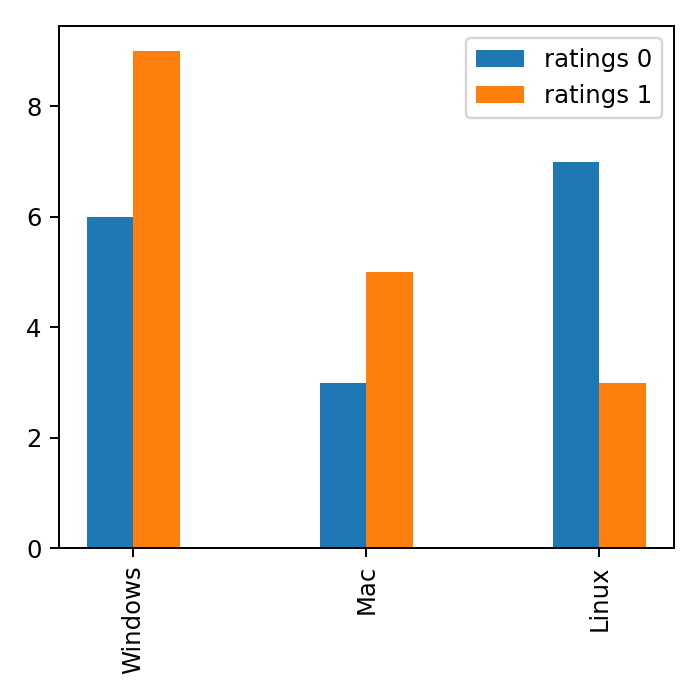

In [49]:
fig,ax = plt.subplots(figsize=(4,4))

x = np.arange(len(df))

ax.bar(x-.1,df[0],width=.2,color='C0',label='ratings 0')
ax.bar(x+.1,df[1],width=.2,color='C1',label='ratings 1')

ax.set_xticks(x)
ax.set_xticklabels(df.index,rotation=90)

ax.legend()

fig.tight_layout()

In [1]:
import pandas as pd

In [3]:
NYSE = pd.read_csv('NYSE_2016_03_25.csv',
                   skiprows=3)

In [4]:
NYSE

,Name,Symbol,Open,High,Low,Close,Net Chg,% Chg,Volume,52 Wk High,52 Wk Low,YTD % Chg
0,3D Systems,DDD,14.14,14.81,13.60,14.76,0.32,2.22,3240444,32.88,6.00,69.85
1,3M,MMM,163.68,164.54,163.05,164.46,0.19,0.12,1730167,167.70,134.00,9.17
2,58.com ADR,WUBA,56.25,56.76,55.28,56.48,-0.04,-0.07,518280,83.71,37.72,-14.37
3,500.com ADR,WBAI,16.46,17.18,16.04,16.88,0.26,1.56,378620,30.67,9.89,-16.02
4,A10 Networks,ATEN,5.85,5.91,5.77,5.87,-0.03,-0.51,126272,8.30,4.12,-10.52
...,...,...,...,...,...,...,...,...,...,...,...,...
2137,Zendesk,ZEN,19.50,19.60,18.98,19.52,-0.12,-0.61,595860,27.54,14.38,-26.17
2138,Zhaopin ADR,ZPIN,15.85,16.00,15.59,15.78,-0.09,-0.57,93009,17.66,11.65,3.00
2139,Zimmer Biomet Holdings,ZBH,103.58,104.31,103.07,103.74,-0.69,-0.66,850675,119.10,88.27,1.12
2140,Zoe's Kitchen,ZOES,37.65,39.00,37.09,38.48,0.71,1.88,154304,46.61,23.17,37.53


In [44]:
def bad_fd(n):
    return int(str(n)[0])

def create_volumes_fd_slice(a,b):
    medium_volumes = NYSE['Volume'].loc[(a <= NYSE['Volume']) & (NYSE['Volume'] < b)]
    medium_volumes_fd = medium_volumes.apply(bad_fd)
    medium_volumes_fd_counts = medium_volumes_fd.value_counts()
    return medium_volumes_fd_counts

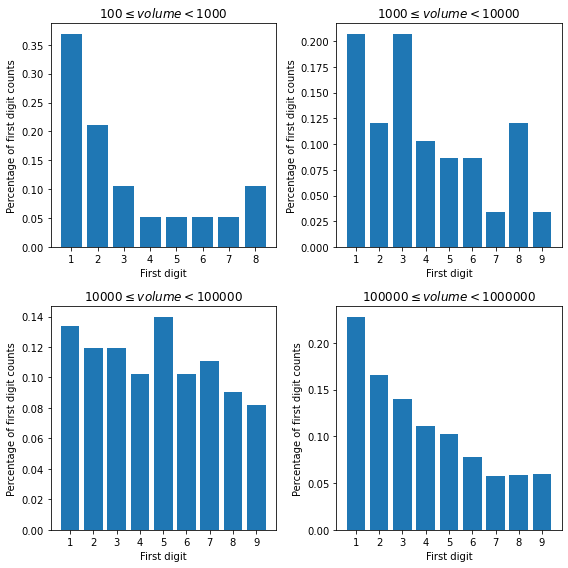

In [50]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(8,8))

alist = [100,1000,10000,100000]
blist = [1000,10000,100000,1000000]

for ax,a,b in zip(axes.flatten(),alist,blist):
    medium_volumes_fd_counts = create_volumes_fd_slice(a,b)
    ax.bar(medium_volumes_fd_counts.index,medium_volumes_fd_counts/medium_volumes_fd_counts.sum())
    ax.set_xticks(medium_volumes_fd_counts.index);
    ax.set_title('${} \leq volume < {}$'.format(a,b))
    ax.set_ylabel('Percentage of first digit counts')
    ax.set_xlabel('First digit')
    
fig.tight_layout()

## Project 10 - Wordle

In [1]:
import requests
url = 'https://jllottes.github.io/_static/projects/wordle.py'
with open('wordle.py','wb') as f:
    f.write(requests.get(url).content)

In [ ]:
url = 'https://jllottes.github.io/_downloads/a4a5f6debb229114cdac858c5a85657d/wordle_words.txt'
with open('wordle_words.txt','wb') as f:
    f.write(requests.get(url).content)

In [5]:
with open('wordle_words.txt','r') as f:
    words = f.read().split()

<IPython.core.display.Javascript object>


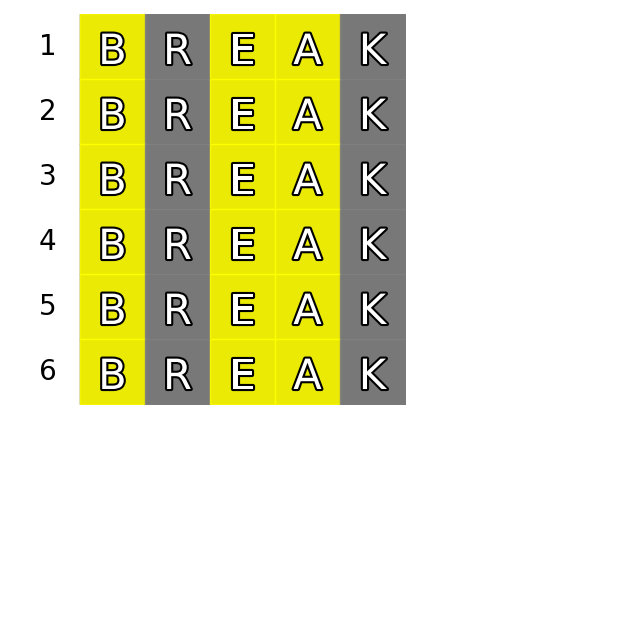

Enter your guess (5 letters): break
Enter your guess (5 letters): break
Enter your guess (5 letters): break
Enter your guess (5 letters): break
Enter your guess (5 letters): break
Enter your guess (5 letters): break
Better luck next time!
The correct word was "TABLE"


In [6]:
%matplotlib notebook
from wordle import evaluate_guess, wordle_game

with open('wordle_words.txt','r') as f:
    words = f.read().split()

game = wordle_game(words)
game.play()

<IPython.core.display.Javascript object>


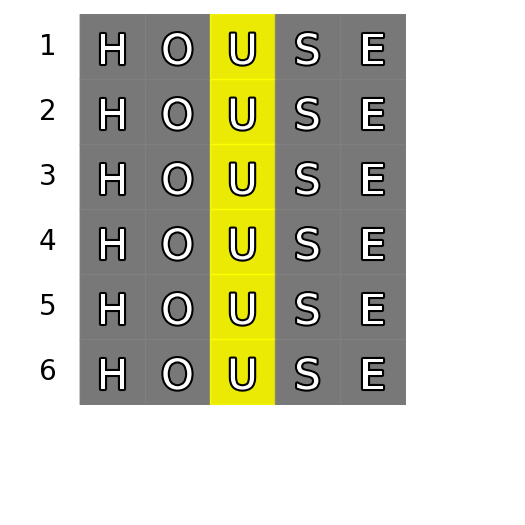

Enter your guess (5 letters): house
Enter your guess (5 letters): house
Enter your guess (5 letters): house
Enter your guess (5 letters): house
Enter your guess (5 letters): house
Enter your guess (5 letters): house
Better luck next time!
The correct word was "CURRY"


In [2]:
game = wordle_game(words)
game.play()

The `evaluate_guess` function returns a list of integers. 
* A `0` means that the letter in the corresponding position of the guess does not appear in the correct answer.
* A `1` means that the letter in the corresponding position of the guess appears in a different position in the correct answer.
* A `2` means that the letter in the corresponding position of the guess appears in the same position in the correct answer.

**Exercise 1.** We will first assume that no letter is ever repeated in any Wordle word. Write a function that takes in a word guess and a correct word, and returns a list of all words that could possibly be correct based on the evaluation returned by `evaluate_guess` (assuming no letter is ever duplicated).

*Hints:*
1. It will be helpful to generate a list of words that do not include any duplicate letters.
2. One way to approach this function is to iterate through the list of possible words (without duplicate letters) and decide whether the given word could possibly be a correct answer. If yes, keep the word, if not, discard it.

In [14]:
print(set('curry'))
print(len(set('curry')))
print(len('curry'))

{'r', 'y', 'c', 'u'}
4
5


In [18]:
words_without_duplicates = [word for word in words if len(set(word)) == len(word)]
print(len(words_without_duplicates))
print(len(words))

1566
2315


In [13]:
guess_word = 'BURNT'
correct_word = 'TABLE'

evaluate_guess(correct_word, guess_word)

[1, 0, 0, 0, 1]

In the above output, we can see that 
* `B` appears in the correct word, but not as the first letter
* `U` does not appear in the correct word
* `R` does not appear in the correct word
* `N` does not appear in the correct word
* `T` appears in the correct word, but as the last letter

*Hint:* It will be useful if your function also can take in a list of acceptable words through which we'll check could be correct.

It might also be helpful to start with all word as possible, and then remove those that are not possible.

In [41]:
guess_word = 'BREAK'
correct_word = 'TABLE'

evaluation = evaluate_guess(correct_word, guess_word)

known_letters_known_positions = [(i,letter) for i,letter in enumerate(guess_word) if evaluation[i] == 2]
known_letters_unknown_positions = [(i,letter) for i,letter in enumerate(guess_word) if evaluation[i] == 1]
known_missing_letters = [letter for i,letter in enumerate(guess_word) if evaluation[i] == 0]

In [42]:
print(known_letters_known_positions)
print(known_letters_unknown_positions)
print(known_missing_letters)

[]
[(0, 'B'), (2, 'E'), (3, 'A')]
['R', 'K']


In [43]:
possible_words = list(words_without_duplicates)

for word in words_without_duplicates:
    removed = False
    for i,letter in known_letters_known_positions:
        if word[i] != letter:
            possible_words.remove(word)
            removed = True
            break
    if not removed:
        for i,letter in known_letters_unknown_positions:
            if not (letter in word and word[i] != letter):
                possible_words.remove(word)
                removed = True
                break
    if not removed:
        for letter in known_missing_letters:
            if letter in word:
                possible_words.remove(word)
                removed = True
                break

In [44]:
possible_words

['ADOBE',
 'AMBLE',
 'ABIDE',
 'ABUSE',
 'TABLE',
 'FABLE',
 'ABODE',
 'ABLED',
 'MAYBE',
 'ABOVE',
 'CABLE']